# Big Data Platfrom

## HW2: MapReduce
### By:
#### Matthew Koton
#### Nofar Yungman


## Objective
Your task is to implement a basic version of the MapReduce programming model using Python's standard libraries.

## Instructions
- Students will form teams of two people each, and submit a single homework for each team.
- The same score for the homework will be given to each member of your team.
- Your solution is in the form of a Jupyter notebook file (with extension ipynb).
- Images/Graphs/Tables should be submitted inside the notebook.
- The notebook should be runnable and properly documented.
- Please answer all the questions and include all your code.
- You are expected to submit a clear and pythonic code.
- DO NOT change functions signatures/definitions.

## Submission:
- Submission of the homework will be done via Moodle by uploading a Jupyter notebook.
- The homework needs to be entirely in English.
- The deadline for submission is on Moodle.
- Late submission won't be allowed.


- In case of identical code submissions - both groups will get a Zero.
- Some groups might be selected randomly to present their code.

## Requirements:
- Python 3.6 should be used.  
- You should implement the algorithms by yourself using only basic Python libraries (such as numpy,pandas,etc.)

## Import & configurations

In [1]:
# general
import os
import time
import random
import warnings
import threading # you can use easier threading packages

# ml
import numpy as np
import scipy as sp
import pandas as pd

# visual
import seaborn as sns
import matplotlib.pyplot as plt

# notebook
from IPython.display import display

In [2]:
# set random seed
random.seed(42)

## Task 1: Generating Random Text Files (10 points)

Generate ten random text files each containing a random sequence of 50 country names. Use the provided template to complete this task.


In [18]:
# List of country names (you need to add more or use a different list)
# Your existing list
country_names = [
    "USA", "Canada", "Mexico", "Brazil", "Argentina", "France", "Germany", "Italy", "Japan", "China",
    "Israel", "Australia", "India", "Russia", "South Africa", "Nigeria", "South Korea", "Spain",
    "United Kingdom", "Egypt", "Turkey", "Sweden", "Norway", "Finland", "Denmark", "Netherlands",
    "Belgium", "Switzerland", "Austria", "Greece", "Portugal", "Ireland", "Poland", "Czech Republic",
    "Hungary", "Romania", "Bulgaria", "Croatia", "Serbia", "Slovenia", "Slovakia", "Lithuania",
    "Latvia", "Estonia", "Ukraine", "Belarus", "Moldova", "Georgia", "Armenia", "Azerbaijan",
    "New Zealand", "Singapore", "Malaysia", "Thailand", "Vietnam", "Philippines", "Indonesia",
    "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Oman", "Jordan",
    "Lebanon", "Syria", "Yemen"
]

generated_file_paths = []

def generate_random_files(num_files=10, num_countries=50):
    # TODO: Implement this function to generate 'num_files' text files,
    # each containing 'num_countries' randomly chosen country names
    # the names of the files should be c_fileIndex.txt ranging from 1 to 10
    # for example: c_8.txt for the eight file
    # You should store the files in countries name folder
    os.makedirs("countries_names", exist_ok=True)

    for file_i in range(num_files):
        selected_countries = random.choices(country_names, k=num_countries)
        file_write_path = f"countries_names/c_{file_i}.txt"
        generated_file_paths.append(file_write_path)
        with open(file_write_path, "w") as output_file:
            for country in selected_countries:
                output_file.write(country + "\n")


# Call the function to generate files
generate_random_files()


## Task 2: MapReduce Implementation (80 points, each function 20 points)

Implement the MapReduce model. Provide implementations for the Map and Reduce functions.<br>
Remember the input and output for each step:
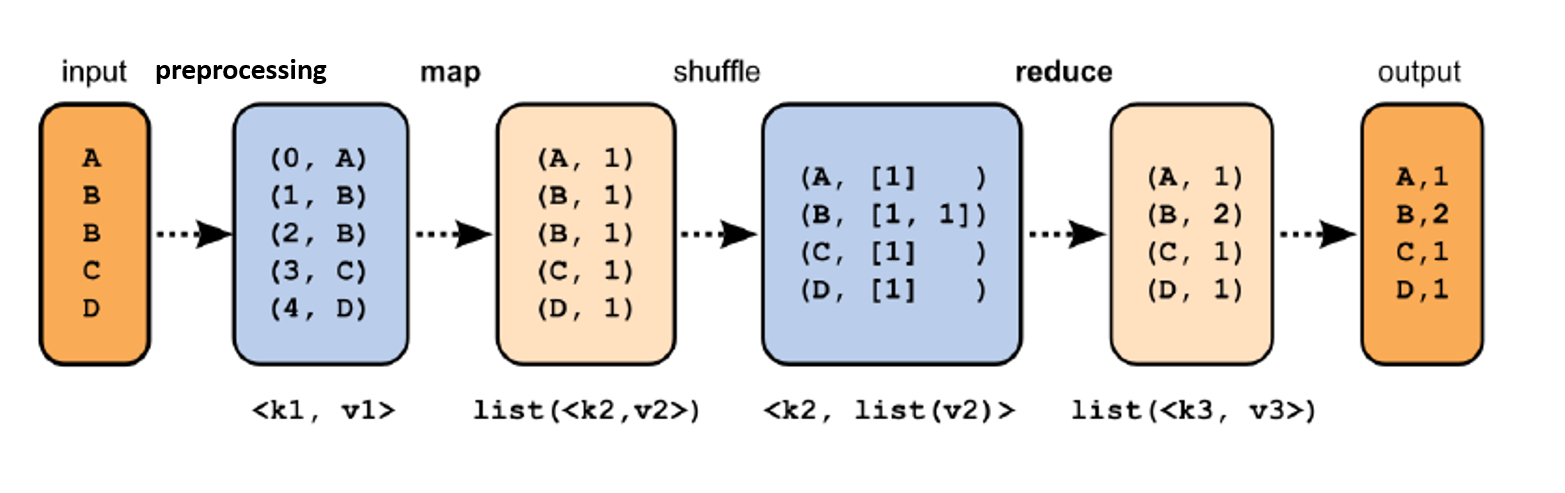

In [19]:
def map_function(file_path):
    # TODO: Implement the map function
    # This function should read the file and emit list of (key, value) pairs
    # Note you should not count the values in this step
    key_value = []
    with open(file_path, 'r') as file:
        line = file.readline()
        while line:
            k_v = (line.strip(), 1)
            key_value.append(k_v)
            line = file.readline()

    return key_value



In [20]:
def shuffle_function(key_value_list):
    # TODO: Implement the shuffle function
    # This function should take a list of (key, value) pairs and group the values by a similar key
    key_value_dict = {}
    for k_v in key_value_list:
        if k_v[0] in key_value_dict.keys():
            key_value_dict[k_v[0]].append(k_v[1])
        else:
            key_value_dict[k_v[0]] = [k_v[1]]
    return key_value_dict



In [21]:
def reduce_function(key, values):
    # TODO: Implement the reduce function
    # This function should take a key and a list of values and combine the values in some way
    count = 0
    for val in values:
        count += val
    return (key, count)



In [22]:
def map_reduce(files):
    # Example usage
    from collections import defaultdict

    key_value_list = []
    shuffled_dict = {}
    reduced_results = []

    # Map phase
    map_threads = []
    for file_path in files:
        map_thread = threading.Thread(target=lambda f=file_path: key_value_list.extend(map_function(f)))
        map_threads.append(map_thread)
        map_thread.start()

    for map_thread in map_threads:
        map_thread.join()

    # Shuffle phase
    grouped_dict = defaultdict(list)

    for key, value in key_value_list:
        grouped_dict[key].append((key, value))

    shuffle_threads = []

    def shuffle_thread_function(key, key_value_list):
        shuffled_dict[key] = shuffle_function(key_value_list).values()

    for key in grouped_dict.keys():
        shuffle_thread = threading.Thread(target=shuffle_thread_function, args=(key, grouped_dict[key]))
        shuffle_threads.append(shuffle_thread)
        shuffle_thread.start()

    for shuffle_thread in shuffle_threads:
        shuffle_thread.join()

    # Reduce phase
    reduced_threads = []

    for key, value in shuffled_dict.items():
        reduced_thread = threading.Thread(target=lambda k=key, v=next(iter(value)): reduced_results.append(reduce_function(k,v)))
        reduced_threads.append(reduced_thread)
        reduced_thread.start()

    for reduced_thread in reduced_threads:
        reduced_thread.join()

    return reduced_results

## Task 3: Testing Your Implementation (10 points)

Test your MapReduce implementation with the generated text files and perform a word count.


In [26]:
# TODO: Write code here to test your MapReduce implementation and perform a word count
map_reduced_results = map_reduce(generated_file_paths)

In [ ]:
len(map_reduced_results)

68

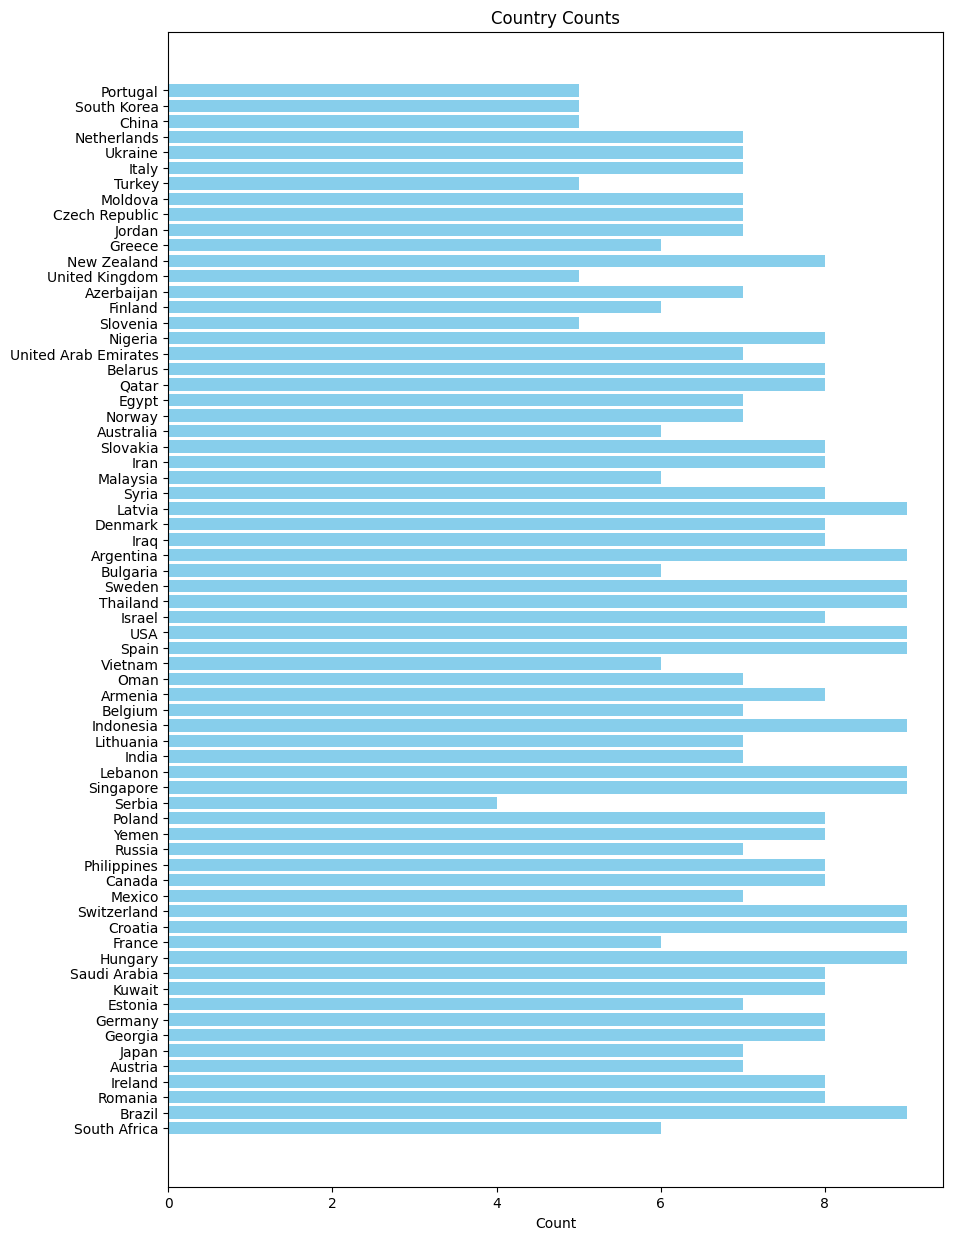

In [ ]:
import matplotlib.pyplot as plt

countries, counts = zip(*map_reduced_results)

plt.figure(figsize=(10, 15))
plt.barh(countries, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Country Counts')
plt.show()

## Resources
- [Python Standard Library Documentation](https://docs.python.org/3/library/)
- [MapReduce: Simplified Data Processing on Large Clusters (Original Paper)](https://research.google.com/archive/mapreduce.html)

## Conclusion

Once you have completed the tasks, ensure your code is well-documented. Submit your Jupyter notebook as per the submission guidelines.
